# 1. Simulation de la planche de Galton

## 1.1. Une simulation avec Geogebra

Voici une excellente simulation de la planche de Galton réalisée par Daniel Mentrard avec Geogebra :

[Vous pouvez jouer !](http://dmentrard.free.fr/GEOGEBRA/Maths/export4.25/Galton.html)

## 1.2. Première approche avec Python

On considère une planche de Galton de $n$ étages. 

Un jeton qui tombe le long de cette planche peut être simuler par $n$ épreuves de Bernoulli dont les issues équiprobables sont :

- "0" si jeton va à gauche
- "1" si le jeton va à droite

Si on repère les positions possibles du jeton par un nombre entier en partant de la droite, la positon finale du jeton correspond à la somme des valeurs des épreuves. Le script suivant permet d’effectuer cette simulation :

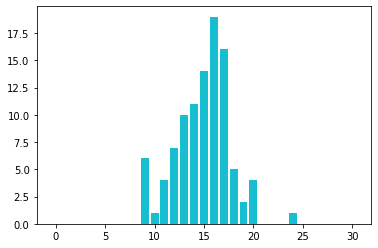

In [10]:
import random

import matplotlib.pyplot as plt
     
def chute(n): #n est le nombre de lignes de la planche
    t = 0
    for k in range(n):
        t = t + random.randint(0,1)
    return t
     
def simule_planche(n_lignes, n_billes):
    resultats = [0 for k in range(n_lignes+1)]
    for k in range(n_billes):
        c = chute(n_lignes)
        resultats[c] = resultats[c] + 1
        plt.bar(range(n_lignes+1),resultats)
    plt.show()
        
simule_planche(30, 100)

## 1.3. Deuxième approche avec Python

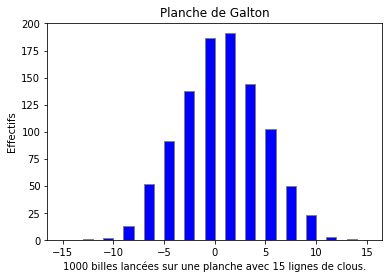

In [17]:
from matplotlib import pyplot 
from random import random

def Galton(n_lignes, n_billes):
    positions = []
    for n in range(n_billes):
        pos = 0
        for l in range(n_lignes):
            r = random()
            if r > 0.5:
                pos += 1 # la bille va a droite
            else: 
                pos -= 1 # sinon a gauche
        positions.append(pos)
    pyplot.hist(positions,range = (-n_lignes, n_lignes), bins = 2*n_lignes, color = 'blue',edgecolor = 'grey')
    pyplot.xlabel(str(n_billes)+' billes lancées sur une planche avec '+str(n_lignes)+' lignes de clous.')
    pyplot.ylabel('Effectifs')
    pyplot.title('Planche de Galton')

Galton(15, 1000)

# 2. Calculs avec une loi binomiale

## 2.1. Calculs de probabilités

On va créer plusieurs fonctions permettant de calculer $P(X=k)$ pour X suivant la loi binomiale de paramètres $n$ et $p$.

On calculera ensuite $P(X<k)$, $P(k\leq X\leq k')$.

In [1]:
# Définition de factorielle
def factorielle(n):
    if n in [0, 1]:
        return 1
    else:
        return n*factorielle(n-1)

#Une autre définition n'utilisant pas d'algorithme récursif
def factorielle2(n):
    if n == 0 or n == 1:
        return 1
    else:
        P = 1
        for k in range(2,n+1):
            P *= k
        return P

# Définition du coefficient binomial binom(n, k) : "k parmi n"
def binom(n, k):
    if n == 0 or k == 0 or k == n:
        return 1
    else:
        return binom(n-1, k-1)+binom(n-1, k)
    
#Avec la formule contenant les factorielles
def binom2(n, k):
    return factorielle(n)/(factorielle(k)*factorielle(n-k))

# Calcul de la probabilité P(X=k) pour X suivant la loi binomiale de paramètres n, p
def proba_binom(n, p, k):
    return binom2(n, k)*p**k*(1-p)**(n-k)

# Calcul de P(k<=X<=k') pour X suivant la loi binomiale de paramètres n, p
def proba_binom_intervalle(n, p, a, b):
    result = 0
    for i in range(a, b+1):
        result += proba_binom(n, p, i)
    return result
    
print(proba_binom_intervalle(10, 0.5, 3, 7))

0.890625


## 2.2. Inversion d'une loi binomiale

On va maintenant chercher les bornes d'intervalle I pour lequel la probabilité que $P(X \in I)$ soit inférieure à un réel $\alpha$ donné (ou supérieure à $1-\alpha$), avec X suivant la loi binomiale de paramètres $n$ et $p$.

Dans le premier cas, on va chercher un intervalle I du type $=[0;k]$ tel que $P(X\in I)\leq \alpha$.

Autrement dit, on va chercher le plus grand entier $k$ tel que $P(X\leq k')\leq \alpha$.

Dans le deuxième cas, on va chercher un intervalle I du type $[0;k]$ tel que $P(X\in I)\geq 1-\alpha$.

Autrement dit, on va chercher le plus petit entier $k$ tel que $P(X\leq k)\geq 1-\alpha$.

In [2]:
# Inversion proba inférieure à alpha
def invBinom_inf(n, p, alpha):
    k = 0
    proba = proba_binom(n, p, 0)
    if proba > alpha:
        return "Impossible"
    while proba <= alpha:
        if k == n:
            return [k, k]
        else:
            k += 1
            proba += proba_binom(n, p, k)
    borne_sup = k-1
    return [0, borne_sup]

print(invBinom_inf(10, 0.5, 0.9))

# Inversion proba supérieure à 1-alpha
def invBinom_sup(n, p, alpha):
    k = 0
    proba = proba_binom(n, p, 0)
    if proba >= 1-alpha:
        return [k, k]
    while proba < 1-alpha:
        if k == n:
            return "Impossible"
        else:
            k += 1
            proba += proba_binom(n, p, k)
    return [0, k]

print(invBinom_sup(10, 0.5, 0.1))
    

[0, 6]
[0, 7]


## 2.2. Problème de la surréservation

### 2.2.1. Première approche

Étant donné une variable aléatoire binomiale X et un réel strictement positif $\alpha$, on cherche à déterminer le plus petit entier $k$ tel que $P(X > k) \leq \alpha$.

**Exemple d'utilisation :**

Une compagnie aérienne utilise pour ses vols long courrier des avions d'une capacité de 375 passagers.

Sachant qu'en moyenne 10% des passagers se désistent ou ne se présentent pas, la compagnie voudrait savoir quel modèle d’avion affréter pour transporter ceux qui, parmi les 375 clients ayant réservé un billet, prendront réellement l’avion. 

Plus précisément, la compagnie accepte de prendre le risque d’avoir à rembourser certains billets, au seuil de 1 pourcent.

**Remarque :**

On peut se ramener à un algorithme qui ressemble au précédent, car 
$P(X > k) \leq \alpha$ équivaut à $1-P(X \leq k) \leq \alpha$,
soit $P(X\leq k)\geq 1-\alpha$.

On peut donc chercher le plus petit entier $k$ tel que $P(X\leq k)\geq 1-\alpha$.

In [5]:
# Problème de la surréservation
# X suit la loi binomiale de paramètres n et p
# On cherche le plus petit entier k tel que P(X>k)<=alpha où alpha est donné

def surreservation(n, p, alpha):
    k = n
    proba = 0
    while proba <= alpha:
        proba += proba_binom(n, p, k)
        k -= 1
    return k+1

print(surreservation(300, 0.9, 0.01))


281


### 2.2.2. Deuxième approche

Nous allons étudier cette approche sur un exemple.

**Problème :**

Une compagnie aérienne utilise pour ses vols long courrier des avions d'une capacité de $k=375$ passagers.

Sachant qu'en moyenne 10% des passagers se désistent ou ne se présentent pas, combien de réservations supplémentaires la compagnie peut-elle prendre sur un tel vol pour que le nombre de passagers se présentant dépasse 375 soit un événement d'une probabilité inférieure à $\alpha$ ?

Si X est la variable aléatoire donnant le nombre de passagers se présentant.

X suit la loi binomiale de paramètres $n$ et $p=0.9$.

On cherche alors le plus grand entier $n$ tel que $P(X>375)\leq \alpha$.

On prendra dans cet exemple $\alpha=0.01$.

In [8]:
def surreservation2(k, p, alpha):
    n = k+1
    proba = proba_binom_intervalle(n, p, k+1, n)
    while proba <= alpha:
        n += 1
        proba = proba_binom_intervalle(n, p, k+1, n)
    return n-1

print(surreservation2(300, 0.9, 0.01))

320
